<a href="https://colab.research.google.com/github/promise32/myrep2/blob/main/loanprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##              Loan Default Prediction Coding Challenge

#Introduction
Financial loan services are leveraged by companies across many industries, from big banks to financial institutions to government loans. One of the primary objectives of companies with financial loan services is to decrease payment defaults and ensure that individuals are paying back their loans as expected. In order to do this efficiently and systematically, many companies employ machine learning to predict which individuals are at the highest risk of defaulting on their loans, so that proper interventions can be effectively deployed to the right audience.

The major objective of this project is to tackle loan default prediction problems on some  very unique and interesting group of individuals who have taken financial loan.

This financial institution has a vested interest in understanding the likelihood of each individual to default on their loan payments so that resources can be allocated appropriately to support these borrowers.

##Objective
The main objective of this project is to predict and show the probability that a loan borrower would default(pay back or not pay back) a borrowed loan.

##Dataset Description



In [35]:
import pandas as pd
path4="/content/drive/MyDrive/data_descriptions.csv"
DataDescriptions= pd.read_csv(path4)
DataDescriptions

,Column_name,Column_type,Data_type,Description
0,LoanID,Identifier,string,A unique identifier for each loan.
1,Age,Feature,integer,The age of the borrower.
2,Income,Feature,integer,The annual income of the borrower.
3,LoanAmount,Feature,integer,The amount of money being borrowed.
4,CreditScore,Feature,integer,"The credit score of the borrower, indicating t..."
5,MonthsEmployed,Feature,integer,The number of months the borrower has been emp...
6,NumCreditLines,Feature,integer,The number of credit lines the borrower has open.
7,InterestRate,Feature,float,The interest rate for the loan.
8,LoanTerm,Feature,integer,The term length of the loan in months.
9,DTIRatio,Feature,float,"The Debt-to-Income ratio, indicating the borro..."


In [1]:

import numpy as np

# Machine Learning / Classification packages
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.dummy import DummyClassifier

# Visualization Packages
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
print('packages where installed sucessfully')

packages where installed sucessfully


In [2]:
# Import any other packages you may want to use
from sklearn.utils.class_weight import compute_sample_weight
from sklearn.metrics import roc_auc_score
from sklearn.tree import DecisionTreeClassifier
import sklearn.tree as tree
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings('ignore')
print('successfully installed')

successfully installed


In [3]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [4]:
path1="/content/drive/MyDrive/test.csv"
path2="/content/drive/MyDrive/train.csv"

In [5]:
test= pd.read_csv(path1)
train= pd.read_csv(path2)

In [6]:
target=train['Default']
train.drop(['Default'], axis=1, inplace=True)

In [7]:
Loandata=train.append(test)

In [8]:
Loandata.isna().sum()

LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
dtype: int64

In [9]:
Loanid=Loandata['LoanID']
Loandata.drop(['LoanID'], axis=1, inplace=True)

In [10]:
Loandata.shape

(364782, 16)

In [36]:
dummy1 = pd.get_dummies(Loandata[["Education","EmploymentType","MaritalStatus","HasMortgage","HasDependents","LoanPurpose","HasCoSigner"]])

dummy1.columns


Index(['Education_Bachelor's', 'Education_High School', 'Education_Master's',
       'Education_PhD', 'EmploymentType_Full-time', 'EmploymentType_Part-time',
       'EmploymentType_Self-employed', 'EmploymentType_Unemployed',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single', 'HasMortgage_No', 'HasMortgage_Yes',
       'HasDependents_No', 'HasDependents_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other', 'HasCoSigner_No', 'HasCoSigner_Yes'],
      dtype='object')

In [12]:
df = pd.concat([Loandata, dummy1], axis=1)

In [13]:
df.drop(["Education","EmploymentType","MaritalStatus","HasMortgage","HasDependents","LoanPurpose","HasCoSigner"], axis = 1, inplace=True)


In [14]:
df

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_Bachelor's,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_No,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15.23,36,0.44,1,...,1,0,1,0,0,0,0,1,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,1,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,0,...,1,0,1,1,0,0,0,0,1,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,1,0,0,0,1,0
4,60,20437,9139,633,8,4,6.51,48,0.73,1,...,0,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109430,67,76970,108110,404,67,3,10.51,36,0.18,0,...,1,0,1,1,0,0,0,0,1,0
109431,44,108272,238508,335,28,1,9.65,24,0.32,0,...,1,0,1,0,0,1,0,0,1,0
109432,54,73526,18513,576,75,2,17.22,36,0.62,0,...,0,0,1,0,0,1,0,0,1,0
109433,60,75296,38414,369,71,4,17.69,36,0.66,0,...,0,1,0,0,1,0,0,0,0,1


<Axes: >

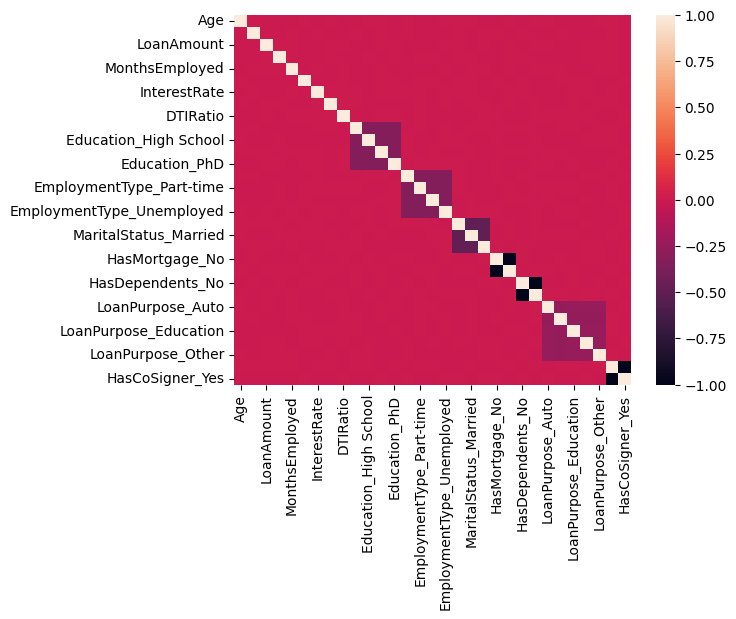

In [15]:
heat=df.corr()
sns.heatmap(heat)

In [16]:
X=df[:len(train)]
X_test= df[len(train):]
y=target


In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=3, stratify=y, shuffle=True)
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape

((178742, 31), (178742,), (76605, 31), (76605,), (109435, 31))

In [18]:
from sklearn import preprocessing
transform = preprocessing.StandardScaler()
X = preprocessing.StandardScaler().fit(X).transform(X)

In [19]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()
lr=LogisticRegression()
GSCV=GridSearchCV(lr, parameters, scoring='accuracy', cv=10)
logreg_cv=GSCV.fit(X_train, y_train)

In [20]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8842409725890089


In [37]:
Prediction_df=logreg_cv.predict(X_test)
logregaccu=logreg_cv.score(X_val, y_val)
predicted_probability = logreg_cv.predict_proba(X_test)
logregaccu

0.884446184974871

In [22]:
predicted_probability.shape

(109435, 2)

In [23]:

Prediction_df= Prediction_df.astype(str)
Prediction_df=np.char.replace(Prediction_df, '0', 'False')
Prediction_df=np.char.replace(Prediction_df, '1', 'True')
Prediction_dF=pd.DataFrame(Prediction_df)
predicted_probability=pd.DataFrame(predicted_probability)

In [28]:
Prediction_df= pd.concat([Loanid,Prediction_dF,predicted_probability], axis=1)

In [29]:
Prediction_df.columns=['LoanID','Default','Probability False','Probability True']

In [30]:
Prediction_df

,LoanID,Default,Probability False,Probability True
0,I38PQUQS96,False,0.941940,0.058060
1,HPSK72WA7R,False,0.978880,0.021120
2,C1OZ6DPJ8Y,False,0.930223,0.069777
3,V2KKSFM3UN,False,0.918112,0.081888
4,EY08JDHTZP,False,0.900852,0.099148
...,...,...,...,...
109430,V12FM6UKMS,False,0.966201,0.033799
109431,GLRB9P0CQO,False,0.863346,0.136654
109432,RWCJ3SL2J6,False,0.958292,0.041708
109433,2Z9IZS4OMY,False,0.956547,0.043453


In [32]:
Prediction_df1=logreg_cv.predict(X_val)
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_val, Prediction_df1))


[[67639    70]
 [ 8782   114]]


In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_val, Prediction_df1, target_names=['False', 'True']))

              precision    recall  f1-score   support

       False       0.89      1.00      0.94     67709
        True       0.62      0.01      0.03      8896

    accuracy                           0.88     76605
   macro avg       0.75      0.51      0.48     76605
weighted avg       0.85      0.88      0.83     76605



##Results and Findings
-The Logistic Regression model predict the train dataset with an accuracy 88% whilst the accuracy on the new data or validation  dataset is about 88%.

-The confusion metrix on the dataset surgest a True positive value count of about 67639 and True Negative value count of about 114 which means that the Machine learning model predicted 67639 value correctly and only 114 values incorrectly which shows a fair prediction of the model.

-The precision on the datasets shows a very high percentage(89%) of loan borrowers not defaulting and low percentage of 62% of individuals defualting.

-The Probability that loan borrowers would default their loan payment is very low and this surgest that only few individuals have high liklihood on defaulting their loan repayment





##Thank you


## Author

Promise Emoghene


Data Source:

https://www.coursera.org/learn/data-science-coding-challenge-loan-default-prediction/programming/L0GW8/loan-default-prediction-coding-challenge


## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
